




































































































































































# Loan Approval Prediction

In today's fast-paced world, financial institutions are under increasing pressure to make accurate and quick decisions regarding loan applications. Traditional methods can be time-consuming and sometimes lead to errors. The Loan Approval Prediction project aims to harness the power of machine learning to predict the approval of loan applications based on a variety of criteria. By integrating data-driven insights, we can significantly improve the accuracy and efficiency of the loan approval process.

The main objective of this project is to build a machine learning model that can predict the likelihood of a loan application being approved. The model will take into account various factors like applicant's credit history, income, employment status, property area, and several others, to render a decision.

## Dataset Link:
https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## Dataset Description:

- **loan_id**: A unique identifier for each loan application.
- **no_of_dependents**: The number of dependents of the loan applicant.
- **education**: The education level of the loan applicant. Values include:
   * Graduate
   * Not Graduate
- **self_employed**: Indicates whether the applicant is self-employed. Possible values:
   * Yes
   * No
- **income_annum**: The annual income of the loan applicant.
- **loan_amount**: The amount of loan requested by the applicant.
- **loan_term**: The duration (in years) for which the loan is requested.
- **cibil_score**: The credit score of the loan applicant.
- **residential_assets_value**: The value of the residential assets owned by the applicant.
- **commercial_assets_value**: The value of the commercial assets owned by the applicant.
- **luxury_assets_value**: The value of luxury assets owned by the applicant.
- **bank_asset_value**: The value of assets held in banks by the applicant.
- **loan_status**: The status of the loan application. Possible values:
   * Approved
   * Rejected


## Installing Dependencies

In [123]:
! pip install numpy pandas matplotlib seaborn scikit-learn tabulate -q

## Code

#### Importing Required Libraries

In [124]:
# importing the necessary libraries

# importing pandas library and renaming it as 'pd' for convenience
import pandas as pd
# importing numpy library and renaming it as 'np' for convenience
import numpy as np
# importing matplotlib's pyplot module and renaming it as 'plt' for convenience
import matplotlib.pyplot as plt
# importing seaborn library and renaming it as 'sns' for convenience
import seaborn as sns
# importing the 'warnings' module from the Python Standard Library
import warnings


# preprocessing

# importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split


# classification models

# importing the Logistic Regression algorithm from sklearn
from sklearn.linear_model import LogisticRegression
# importing the K-Nearest Neighbors algorithm from sklearn
from sklearn.neighbors import KNeighborsClassifier
# importing the Decision Tree algorithm from sklearn
from sklearn.tree import DecisionTreeClassifier
# importing the Random Forest algorithm from sklearn
from sklearn.ensemble import RandomForestClassifier
# importing the Support Vector Machine algorithm from sklearn
from sklearn.svm import SVC
# importing the Gaussian Naive Bayes algorithm from sklearn
from sklearn.naive_bayes import GaussianNB


# performance metrics

# importing the k-fold cross validation from sklearn
from sklearn.model_selection import cross_val_score
# importing the accuracy_score metric from sklearn
from sklearn.metrics import accuracy_score
# importing the confusion_matrix metric from sklearn
from sklearn.metrics import confusion_matrix
# importing the classification_report metric from sklearn
from sklearn.metrics import classification_report
# importing the recall score metric from sklearn
from sklearn.metrics import recall_score
# importing the precision score metric from sklearn
from sklearn.metrics import precision_score
# importing the f1 score metric from sklearn
from sklearn.metrics import accuracy_score
# importing the f1 score metric from sklearn
from sklearn.metrics import f1_score
# importing confusion matrix display from sklearn
from sklearn.metrics import ConfusionMatrixDisplay
# import the roc_auc_score metric from sklearn
from sklearn.metrics import roc_curve, auc


#### Suppressing Warnings

In [125]:
# setting a filter for warning messages to 'ignore,' which will suppress warning messages
warnings.filterwarnings('ignore')

### Analyzing the Dataset

In [126]:
# reading the csv file into a pandas dataframe
dataset = pd.read_csv('loan_approval_dataset.csv')

In [127]:
# printing the first five rows of the dataset
print(dataset.head().to_markdown())

|    |   loan_id |    no_of_dependents |  education   |  self_employed   |    income_annum |    loan_amount |    loan_term |    cibil_score |    residential_assets_value |    commercial_assets_value |    luxury_assets_value |    bank_asset_value |  loan_status   |
|---:|----------:|--------------------:|:-------------|:-----------------|----------------:|---------------:|-------------:|---------------:|----------------------------:|---------------------------:|-----------------------:|--------------------:|:---------------|
|  0 |         1 |                   2 | Graduate     | No               |         9600000 |       29900000 |           12 |            778 |                     2400000 |                   17600000 |               22700000 |             8000000 | Approved       |
|  1 |         2 |                   0 | Not Graduate | Yes              |         4100000 |       12200000 |            8 |            417 |                     2700000 |                    2200000 |     

In [128]:
# printing the number of rows and columns in the dataset
print("\nNumber of rows and columns in the dataset: ", dataset.shape)


Number of rows and columns in the dataset:  (4269, 13)


In [129]:
# printing the number of missing values in each column
print("\nNumber of missing values in each column: \n", dataset.isnull().sum())



Number of missing values in each column: 
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [130]:
# printing the descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset: \n", dataset.describe().to_markdown())


Descriptive statistics of the dataset: 
 |       |   loan_id |    no_of_dependents |     income_annum |      loan_amount |    loan_term |    cibil_score |    residential_assets_value |    commercial_assets_value |    luxury_assets_value |    bank_asset_value |
|:------|----------:|--------------------:|-----------------:|-----------------:|-------------:|---------------:|----------------------------:|---------------------------:|-----------------------:|--------------------:|
| count |    4269   |          4269       |   4269           |   4269           |   4269       |       4269     |              4269           |             4269           |         4269           |      4269           |
| mean  |    2135   |             2.49871 |      5.05912e+06 |      1.51335e+07 |     10.9004  |        599.936 |                 7.47262e+06 |                4.97316e+06 |            1.51263e+07 |         4.97669e+06 |
| std   |    1232.5 |             1.69591 |      2.80684e+06 |      9.04336e+0

In [131]:
# printing the data types of each column
print("\nData types of each column: \n", dataset.dtypes)


Data types of each column: 
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [132]:
# number of unique values in categorical columns
print("\nNumber of unique values in categorical columns: \n", dataset.select_dtypes(include=['object']).nunique())


Number of unique values in categorical columns: 
  education        2
 self_employed    2
 loan_status      2
dtype: int64


In [133]:
# removing trailing spaces in column names
dataset.columns = dataset.columns.str.strip()

In [134]:
# number of unique values in all columns
print("\nNumber of unique values in all columns: \n", dataset.nunique())


Number of unique values in all columns: 
 loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64


In [135]:
# number of approved and rejected loan applications
print("\nNumber of approved and rejected loan applications: \n", dataset['loan_status'].value_counts())


Number of approved and rejected loan applications: 
 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


### Data Pre-processing

#### Data Cleaning

In [136]:
# removing trailing spaces in all the columns
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [137]:
# strip the spaces in categorical columns
dataset[dataset.select_dtypes(include=['object']).columns] = dataset.select_dtypes(include=['object']).apply(lambda x: x.str.strip())

#### Data Transformation

In [138]:
# identifying the categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# identifying the the unique values in each categorical column
unique_values = {col: dataset[col].unique() for col in categorical_columns}

# printing the unique values in each categorical column
for key, value in unique_values.items():
    print("Unique values in column", key, "are: ", value)

Unique values in column education are:  ['Graduate' 'Not Graduate']
Unique values in column self_employed are:  ['No' 'Yes']
Unique values in column loan_status are:  ['Approved' 'Rejected']


In [139]:
# reversing the order of the unque values in the 'education' array
unique_values['education'] = np.flip(unique_values['education'])

# reversing the order of the uniqe values in the 'loan_status' array
unique_values['loan_status'] = np.flip(unique_values['loan_status'])

# printing the unique values in each categorical column
for key, value in unique_values.items():
    print("Unique values in column", key, "are: ", value)

Unique values in column education are:  ['Not Graduate' 'Graduate']
Unique values in column self_employed are:  ['No' 'Yes']
Unique values in column loan_status are:  ['Rejected' 'Approved']


In [140]:
# encoding the categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [141]:
# columns to scale

# removing the 'loan_id' and 'loan_status' columns from the list of columns to scale
columns_to_scale = dataset.columns.difference(['loan_id', 'loan_status'])
# removing all the categorical columns from the list of columns to scale
columns_to_scale = columns_to_scale.difference(categorical_columns)

# scaling the columns
scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

#### Data Reduction

In [142]:
# dropping the 'loan_id' column
dataset.drop('loan_id', axis=1, inplace=True)

In [143]:
# printing the first five rows of the updated dataset
print("\nUpdated dataset copy:\n", dataset.head().to_markdown())


Updated dataset copy:
 |    |   no_of_dependents |   education |   self_employed |   income_annum |   loan_amount |   loan_term |   cibil_score |   residential_assets_value |   commercial_assets_value |   luxury_assets_value |   bank_asset_value |   loan_status |
|---:|-------------------:|------------:|----------------:|---------------:|--------------:|------------:|--------------:|---------------------------:|--------------------------:|----------------------:|-------------------:|--------------:|
|  0 |          -0.294102 |           0 |               0 |        1.61798 |      1.63305  |    0.192617 |      1.03279  |                 -0.780058  |                  2.87729  |              0.832028 |         0.930304   |             0 |
|  1 |          -1.47355  |           1 |               1 |       -0.34175 |     -0.324414 |   -0.508091 |     -1.06105  |                 -0.733924  |                 -0.631921 |             -0.694993 |        -0.515936   |             1 |
|  2 |      

### Training and Testing the Machine Learning Models on Various Algorithms

In [144]:
# splitting the dataset into features and target variable
X = dataset.drop(columns=['loan_status'])
y = dataset['loan_status']

In [145]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# printing the number of rows and columns in the training set
print("Number of rows and columns in the training set: ", X_train.shape)

# printing the number of rows and columns in the testing set
print("Number of rows and columns in the testing set: ", X_test.shape)

Number of rows and columns in the training set:  (3415, 11)
Number of rows and columns in the testing set:  (854, 11)


In [146]:
# creating an empty dictionary to store the performance metrics of each model
performance_metrics = {}

#### Logistic Regression Model


In [147]:
# applying the Logistic Regression classifier to the training set
log_reg = LogisticRegression()

# training the Logistic Regression classifier
log_reg.fit(X_train, y_train)

LogisticRegression()

In [148]:
# predicting the target variable for the testing set
y_test_pred = log_reg.predict(X_test)

In [149]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(log_reg, "decision_function"):
        probas = log_reg.decision_function(X_test)
else:
    probas = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving logistic regression performance metrics
performance_metrics["Logistic Regression"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}



Confusion Matrix: 
[[498  38]
 [ 43 275]]
Accuracy:  0.905152224824356
Precision:  0.8995559046376076
Recall:  0.8969421759128884
F1 Score:  0.898211707993237

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



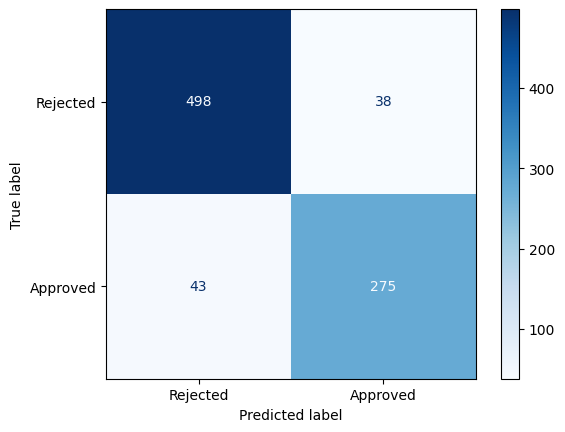

In [150]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

#### K-Nearest Neighbours Model

In [151]:
# applying the K-Nearest Neighbors classifier to the training set
knn = KNeighborsClassifier()

# training the K-Nearest Neighbors classifier
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [152]:
# predicting the target variable for the testing set
y_test_pred = knn.predict(X_test)

In [153]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(knn, "decision_function"):
        probas = knn.decision_function(X_test)
else:
    probas = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving K nearest neighbours performance metrics
performance_metrics["K Nearest Neighbour"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}


Confusion Matrix: 
[[485  51]
 [ 35 283]]
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       536
           1       0.85      0.89      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



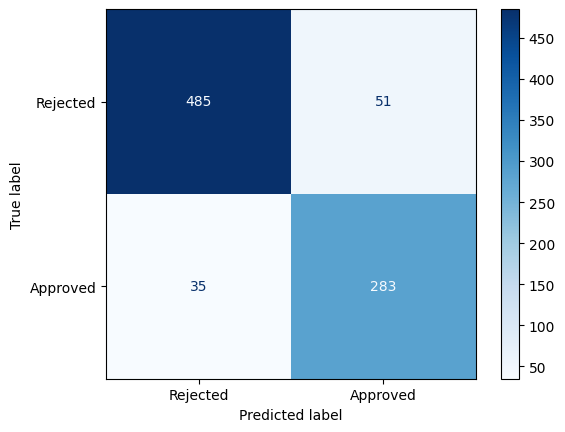

In [154]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

#### Decision Tree Model

In [155]:
# applying the Decision Tree classifier to the training set
decision_tree = DecisionTreeClassifier()

# training the Decision Tree classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [156]:
# predicting the target variable for the testing set
y_test_pred = knn.predict(X_test)

In [157]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(decision_tree, "decision_function"):
        probas = decision_tree.decision_function(X_test)
else:
    probas = decision_tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving Decision Tree performance metrics
performance_metrics["Decision Tree"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}


Confusion Matrix: 
[[485  51]
 [ 35 283]]
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       536
           1       0.85      0.89      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



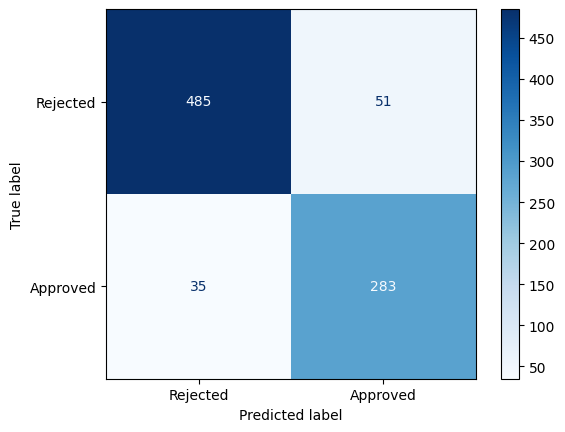

In [158]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

#### Support Vector Machine Model

In [159]:
# applying the Support Vector Machine classifier to the training set
svm = SVC()

# training the Support Vector Machine classifier
svm.fit(X_train, y_train)

SVC()

In [160]:
# predicting the target variable for the testing set
y_test_pred = knn.predict(X_test)

In [161]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(svm, "decision_function"):
        probas = svm.decision_function(X_test)
else:
    probas = svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving support vector machine performance metrics
performance_metrics["Support Vector Machine"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}


Confusion Matrix: 
[[485  51]
 [ 35 283]]
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       536
           1       0.85      0.89      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



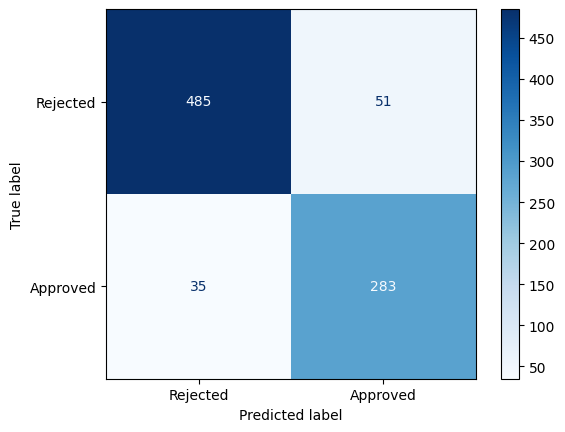

In [162]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

#### Naive Bayes Model

In [163]:
# applying the Gaussian Naive Bayes classifier to the training set
gaussian_nb = GaussianNB()

# training the Gaussian Naive Bayes classifier
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [164]:
# predicting the target variable for the testing set
y_test_pred = knn.predict(X_test)

In [165]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(gaussian_nb, "decision_function"):
        probas = gaussian_nb.decision_function(X_test)
else:
    probas = gaussian_nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving Gaussian NB performance metrics
performance_metrics["Gaussian NB"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}


Confusion Matrix: 
[[485  51]
 [ 35 283]]
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       536
           1       0.85      0.89      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



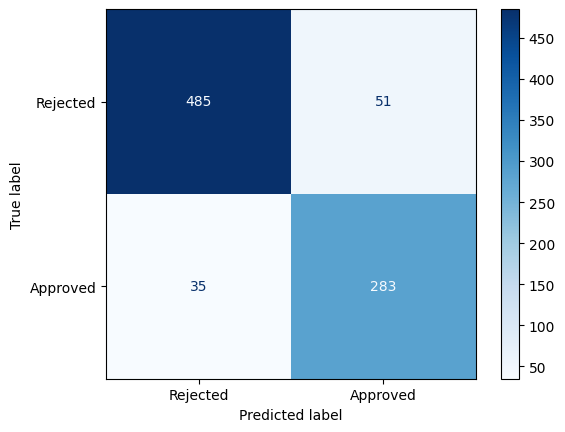

In [166]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

#### Random Forest Classifier Model

In [167]:
# applying random forest classifier on the training set
rf_classifier = RandomForestClassifier(random_state=42)

# training the random forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [168]:
# predicting the target variable for the testing set
y_test_pred = rf_classifier.predict(X_test)

In [169]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))

# accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(y_test, y_test_pred, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(y_test, y_test_pred, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_test_pred))

#ROC curve
if hasattr(rf_classifier, "decision_function"):
        probas = rf_classifier.decision_function(X_test)
else:
    probas = rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

#saving Random Forest Classifier performance metrics
performance_metrics["Random Forest Classifier"] = {"Accuracy":accuracy, "Precision":precision, "Recall":recall, "F1 Score":f1, "FPR":fpr, "TPR":tpr, "Thresholds":thresholds, "ROC":roc_auc}


Confusion Matrix: 
[[529   7]
 [ 11 307]]
Accuracy:  0.9789227166276346
Precision:  0.9786683179995281
Recall:  0.9761745517694547
F1 Score:  0.977395181403228

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



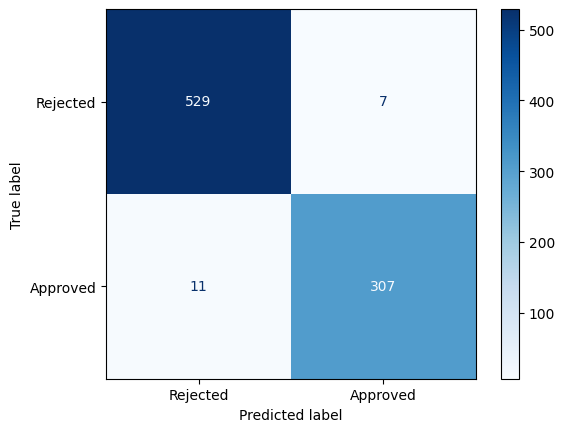

In [170]:
# printing the colored confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Rejected', 'Approved'])
cmd.plot(cmap='Blues')

## Comparing the Models and Selecting the Best One

In [171]:
# printing the performance metrics of each model
print("\nPerformance metrics of each model: \n")
for key, value in performance_metrics.items():
    print("Model: ", key)
    print("Accuracy: ", value["Accuracy"])
    print("Precision: ", value["Precision"])
    print("Recall: ", value["Recall"])
    print("F1 Score: ", value["F1 Score"])

    print("\n")


Performance metrics of each model: 

Model:  Logistic Regression
Accuracy:  0.905152224824356
Precision:  0.8995559046376076
Recall:  0.8969421759128884
F1 Score:  0.898211707993237


Model:  K Nearest Neighbour
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043


Model:  Decision Tree
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043


Model:  Support Vector Machine
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043


Model:  Gaussian NB
Accuracy:  0.8992974238875878
Precision:  0.8899988484569323
Recall:  0.8973939265934479
F1 Score:  0.8933293827849043


Model:  Random Forest Classifier
Accuracy:  0.9789227166276346
Precision:  0.9786683179995281
Recall:  0.9761745517694547
F1 Score:  0.977395181403228




ROC Curve

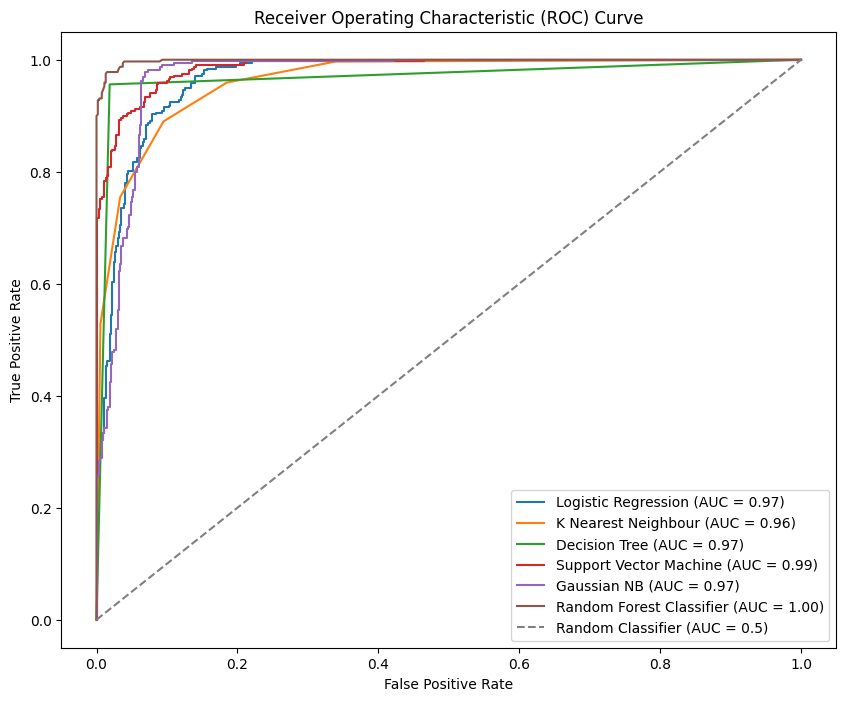

In [172]:
# plotting the ROC curve for each model
plt.figure(figsize=(10, 8))
for key, value in performance_metrics.items():
    fpr = value["FPR"]
    tpr = value["TPR"]
    roc_auc = value["ROC"]
    plt.plot(fpr, tpr, label=f'{key} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for a random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray',
         label='Random Classifier (AUC = 0.5)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Making Predictions

In [173]:
# sample input in the form of a dictionary
sample_input = {
    'no_of_dependents': 2,
    'education': "Graduate",
    'self_employed': 'No',
    'income_annum': 500,
    'loan_amount': 20000000,
    'loan_term': 15,
    'cibil_score': 750,
    'residential_assets_value': 1000,
    'commercial_assets_value': 5000,
    'luxury_assets_value': 250,
    'bank_asset_value': 5000
}

# converting the dictionary to DataFrame
sample_df = pd.DataFrame([sample_input])

# encoding the categorical columns
le = LabelEncoder()
sample_df['education'] = le.fit_transform(sample_df['education'])
sample_df['self_employed'] = le.fit_transform(sample_df['self_employed'])


# # scale numerical features
sample_df[columns_to_scale] = scaler.transform(sample_df[columns_to_scale])

# printing the sample input
print("Sample input:\n", sample_df.to_markdown())

Sample input:
 |    |   no_of_dependents |   education |   self_employed |   income_annum |   loan_amount |   loan_term |   cibil_score |   residential_assets_value |   commercial_assets_value |   luxury_assets_value |   bank_asset_value |
|---:|-------------------:|------------:|----------------:|---------------:|--------------:|------------:|--------------:|---------------------------:|--------------------------:|----------------------:|-------------------:|
|  0 |          -0.294102 |           0 |               0 |       -1.80246 |      0.538198 |    0.718147 |      0.870389 |                   -1.14897 |                   -1.1321 |              -1.66171 |           -1.52984 |


In [174]:
# predicting the target variable for the sample input
sample_prediction = rf_classifier.predict(sample_df)

# printing the prediction
print("Prediction: ", "Approved" if sample_prediction[0] == 0 else "Rejected")

Prediction:  Approved


## Conclusion

Through the Loan Approval Prediction project, we successfully implemented a machine learning solution to predict the approval of loan applications based on the provided features. The main steps undertaken in this project were:

- **Data Exploration**: We began by understanding the structure of the dataset, checking for missing values, and analyzing the statistics of each feature.
- **Data Pre-processing**: This involved data cleaning where trailing spaces were removed. Data transformation was then performed wherein categorical variables were encoded using the LabelEncoder and numerical features were scaled using the StandardScaler.
- **Model Training**: We used the Random Forest Classifier, which is known for its robustness and capability to handle a variety of data types. The dataset was split into training, validation, and testing subsets. The model was then trained on the training subset.
- **Model Testing**: We validated the model on a validation subset and checked its accuracy. This step helps in understanding how well the model will generalize to unseen data.

The achieved accuracy on the validation set indicates the model's ability to predict loan application approvals. However, there are several ways this project can be further improved:

- **Feature Engineering**: Creating new features or transforming existing features might enhance the model's predictive power.
- **Hyperparameter Tuning**: The performance of the Random Forest Classifier can be enhanced by tuning its hyperparameters.
- **Use of Advanced Models**: More sophisticated algorithms like Gradient Boosting or Neural Networks can be tried to possibly achieve better results.
- **Handling Imbalanced Data**: If the dataset is imbalanced, techniques like oversampling, undersampling, or using the Synthetic Minority Over-sampling Technique (SMOTE) can be applied.